In [1]:
pip install --user numpy

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd #import pandas libaray

In [2]:
df = pd.read_csv(r"C:\Users\Khushi\Documents\Unified Mentor Internship\Bird Data\Bird Strikes data.xlsx - Bird Strikes.csv")

In [3]:
df.head(2)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [5]:
df.describe()

,Record ID,Wildlife: Number Struck Actual,Number of people injured
count,25558.000000,25558.000000,25558.000000
mean,253916.085609,2.691525,0.001056
std,38510.453382,12.793975,0.050420
min,1195.000000,1.000000,0.000000
25%,225783.750000,1.000000,0.000000
50%,248749.000000,1.000000,0.000000
75%,269168.750000,1.000000,0.000000
max,321909.000000,942.000000,6.000000


In [6]:
# Check if missing values
df.isnull().sum()

Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                                0
Wildlife: Species   

In [7]:
# Impute missing values for numerical columns
numerical_columns = ['Wildlife: Number struck', 'Feet above ground']
df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Fill missing values in numerical columns with the mean
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

# Convert 'Feet above ground' to int after imputation
df['Feet above ground'] = df['Feet above ground'].astype(int)

# Drop rows with missing values in categorical columns
categorical_columns = ['Aircraft: Type', 'Airport: Name', 'Altitude bin', 'Effect: Impact to flight',
                        'When: Phase of flight', 'Conditions: Precipitation', 'Remarks', 'Wildlife: Size',
                        'Conditions: Sky', 'Wildlife: Species', 'Pilot warned of birds or wildlife?',
                        'Is Aircraft Large?', 'Aircraft: Number of engines?', 'Origin State']

df[categorical_columns] = df[categorical_columns].fillna(df[categorical_columns].mode().iloc[0])

# Check if missing values are handled
df.isnull().sum()

Record ID                                    0
Aircraft: Type                               0
Airport: Name                                0
Altitude bin                                 0
Aircraft: Make/Model                         0
Wildlife: Number struck                      0
Wildlife: Number Struck Actual               0
Effect: Impact to flight                     0
FlightDate                                 129
Effect: Indicated Damage                     0
Aircraft: Number of engines?                 0
Aircraft: Airline/Operator                 129
Origin State                                 0
When: Phase of flight                        0
Conditions: Precipitation                    0
Remains of wildlife collected?               0
Remains of wildlife sent to Smithsonian      0
Remarks                                      0
Wildlife: Size                               0
Conditions: Sky                              0
Wildlife: Species                            0
Pilot warned 

In [8]:
# Impute missing values for 'FlightDate' using forward fill
df['FlightDate'] = df['FlightDate'].ffill()

# Impute missing values for 'Aircraft: Airline/Operator' using the most frequent value
df['Aircraft: Airline/Operator'] = df['Aircraft: Airline/Operator'].fillna(df['Aircraft: Airline/Operator'].mode().iloc[0])

# Check if missing values are handled
df.isnull().sum()

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
Effect: Impact to flight                   0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Conditions: Precipitation                  0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Remarks                                    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Tota

In [9]:
df.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,1.0,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736",106,0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,1.0,424,Precautionary Landing,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,1.0,261,Precautionary Landing,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,1.0,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,1.0,942,Precautionary Landing,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [11]:
import matplotlib.pyplot as plt

<ipython-input-12-ca64dad2d878>:27: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['FlightDate'] = pd.to_datetime(df['FlightDate'])


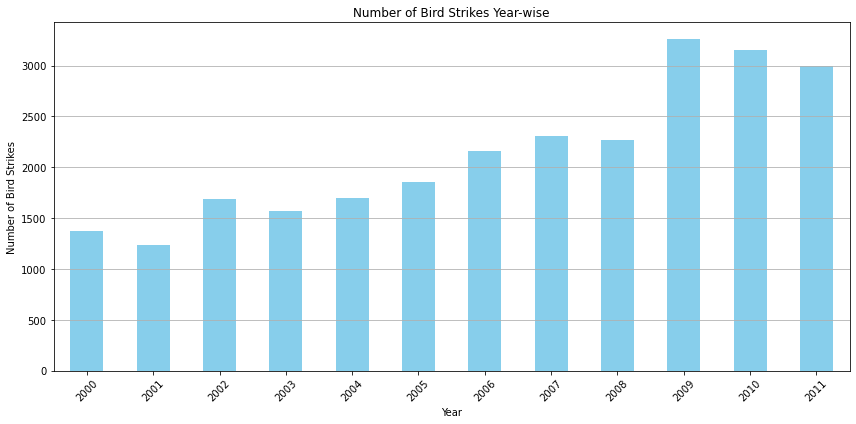

In [12]:
def plot_yearly_bird_strikes(data):
    """
    Plot the number of bird strikes year-wise.

    Parameters:
    - data: DataFrame containing bird strike data with 'FlightDate' column.
    """
    # Extract year from 'FlightDate'
    data['Year'] = data['FlightDate'].dt.year
    
    # Group data by year and count the number of occurrences
    yearly_bird_strikes = data.groupby('Year').size()

    # Plotting
    plt.figure(figsize=(12, 6))
    yearly_bird_strikes.plot(kind='bar', color='skyblue')
    plt.title('Number of Bird Strikes Year-wise')
    plt.xlabel('Year')
    plt.ylabel('Number of Bird Strikes')
    plt.grid(axis='y')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Assuming 'df' is your DataFrame containing bird strike data
# Make sure 'FlightDate' is in datetime format
df['FlightDate'] = pd.to_datetime(df['FlightDate'])

plot_yearly_bird_strikes(df)

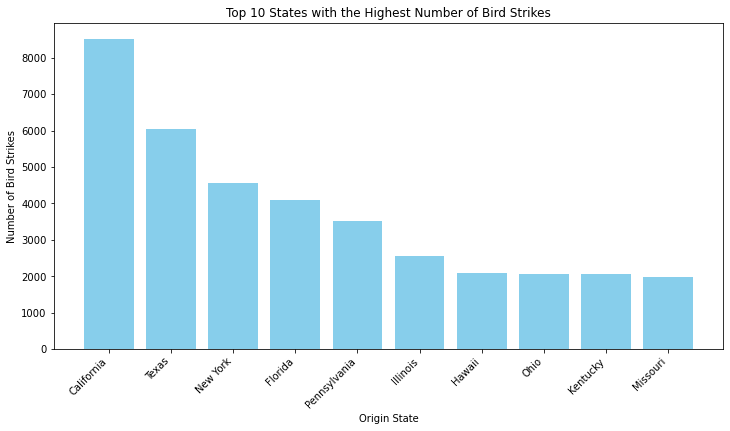

In [13]:
# Group the data by 'Origin State' and calculate the total number of bird strikes
bird_strikes_by_state = df.groupby('Origin State')['Wildlife: Number Struck Actual'].sum().reset_index()

# Sort the data to get the highest number of bird strikes
bird_strikes_by_state = bird_strikes_by_state.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

# Select only the top 10 states
top_10_states = bird_strikes_by_state.head(10)

# Plot the data using matplotlib for the top 10 states
plt.figure(figsize=(12, 6))
plt.bar(top_10_states['Origin State'], top_10_states['Wildlife: Number Struck Actual'], color='skyblue')
plt.title('Top 10 States with the Highest Number of Bird Strikes')
plt.xlabel('Origin State')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

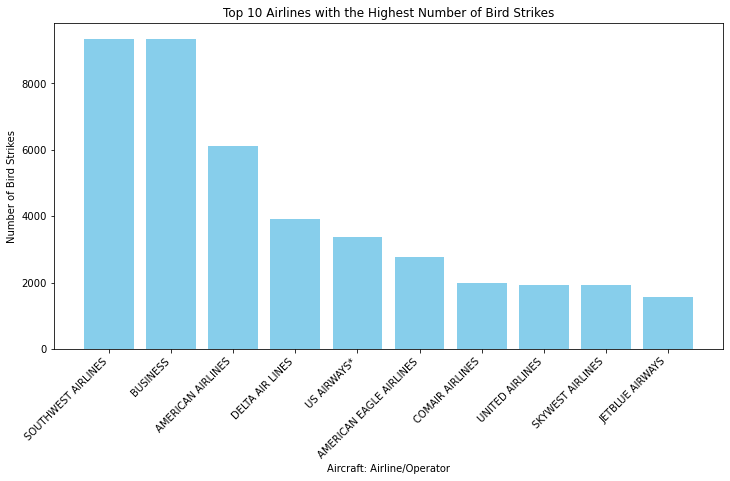

In [14]:
# Group the data by 'Aircraft: Airline/Operator' and calculate the total number of bird strikes
bird_strikes_by_airline = df.groupby('Aircraft: Airline/Operator')['Wildlife: Number Struck Actual'].sum().reset_index()

# Sort the data to get the highest number of bird strikes
bird_strikes_by_airline = bird_strikes_by_airline.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

# Select only the top 10 airlines
top_10_airlines = bird_strikes_by_airline.head(10)

# Plot the data using matplotlib for the top 10 airlines
plt.figure(figsize=(12, 6))
plt.bar(top_10_airlines['Aircraft: Airline/Operator'], top_10_airlines['Wildlife: Number Struck Actual'], color='skyblue')
plt.title('Top 10 Airlines with the Highest Number of Bird Strikes')
plt.xlabel('Aircraft: Airline/Operator')
plt.ylabel('Number of Bird Strikes')
plt.xticks(rotation=45, ha='right')
plt.show()

In [15]:
#pip install folium

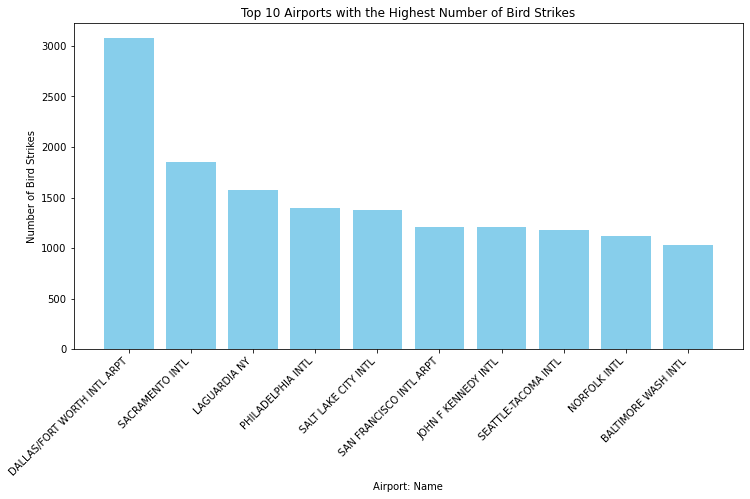

In [18]:
def analyze_and_rank_airports(df, airport_column='Airport: Name'):
    # Group the data by airport and calculate the total number of bird strikes
    bird_strikes_by_airport = df.groupby(airport_column)['Wildlife: Number Struck Actual'].sum().reset_index()

    # Sort the data to get the highest number of bird strikes
    bird_strikes_by_airport = bird_strikes_by_airport.sort_values(by='Wildlife: Number Struck Actual', ascending=False)

    return bird_strikes_by_airport

def plot_top_airports(df, top_n=10, airport_column='Airport: Name'):
    # Analyze and rank airports
    top_airports = analyze_and_rank_airports(df, airport_column=airport_column).head(top_n)

    # Plot the data using matplotlib for the top airports
    plt.figure(figsize=(12, 6))
    plt.bar(top_airports[airport_column], top_airports['Wildlife: Number Struck Actual'], color='skyblue')
    plt.title(f'Top {top_n} Airports with the Highest Number of Bird Strikes')
    plt.xlabel(airport_column)
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Example usage:
# Assuming your DataFrame is named 'bird_strike_data'
# Adjust column names as needed
plot_top_airports(df, top_n=10, airport_column='Airport: Name')


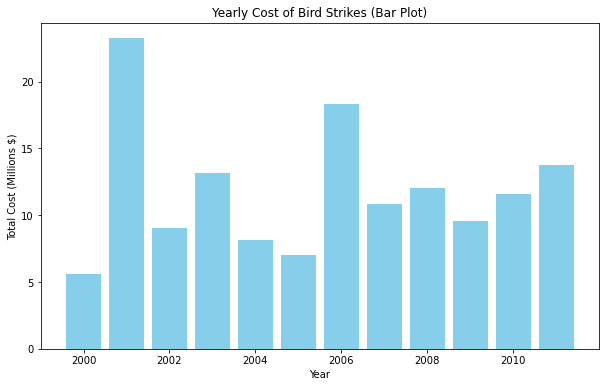

In [48]:
def calculate_yearly_cost(df, cost_column='Cost: Total $'):
    # Convert 'FlightDate' to datetime if not already
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])

    # Extract year from the 'FlightDate'
    df['Year'] = df['FlightDate'].dt.year

    # Clean up the 'Cost: Total $' column and convert to numeric
    #df[cost_column] = pd.to_numeric(df[cost_column].replace({'[^0-9,]': ''}, regex=True).str.replace(',', ''), errors='coerce')

    # Group by year and calculate the total cost
    yearly_cost = df.groupby('Year')[cost_column].sum().reset_index()

    return yearly_cost

# Example usage:
# Assuming 'df' is your DataFrame with bird strike data
yearly_cost_data = calculate_yearly_cost(df)

def visualize_yearly_cost_bar_millions(yearly_cost_df):
    # Convert the 'Cost: Total $' column to numeric by removing commas
    yearly_cost_df['Cost: Total $'] = yearly_cost_df['Cost: Total $'].replace({',': ''}, regex=True)
    yearly_cost_df['Cost: Total $'] = pd.to_numeric(yearly_cost_df['Cost: Total $'])

    # Convert cost to millions
    yearly_cost_df['Cost (Millions)'] = yearly_cost_df['Cost: Total $'] / 1e6

    plt.figure(figsize=(10, 6))
    plt.bar(yearly_cost_df['Year'], yearly_cost_df['Cost (Millions)'], color='skyblue')
    plt.title('Yearly Cost of Bird Strikes (Bar Plot)')
    plt.xlabel('Year')
    plt.ylabel('Total Cost (Millions $)')
    plt.show()

# Example usage:
# Assuming 'yearly_cost_data' is your DataFrame from the previous code
visualize_yearly_cost_bar_millions(yearly_cost_data)

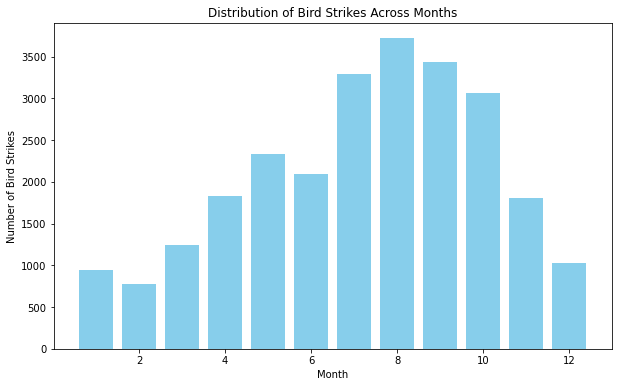

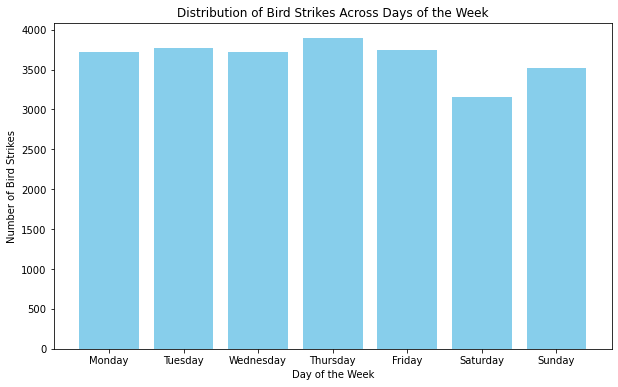

In [49]:
def analyze_timing(df):
    # Convert 'FlightDate' to datetime if not already
    df['FlightDate'] = pd.to_datetime(df['FlightDate'])

    # Extract month and day of the week from 'FlightDate'
    df['Month'] = df['FlightDate'].dt.month
    df['DayOfWeek'] = df['FlightDate'].dt.dayofweek

    # Plot the distribution of bird strikes across months
    plot_month_distribution(df)

    # Plot the distribution of bird strikes across days of the week
    plot_day_of_week_distribution(df)

def plot_month_distribution(df):
    monthly_counts = df['Month'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(monthly_counts.index, monthly_counts.values, color='skyblue')
    plt.title('Distribution of Bird Strikes Across Months')
    plt.xlabel('Month')
    plt.ylabel('Number of Bird Strikes')
    plt.show()

def plot_day_of_week_distribution(df):
    day_of_week_counts = df['DayOfWeek'].value_counts().sort_index()

    plt.figure(figsize=(10, 6))
    plt.bar(day_of_week_counts.index, day_of_week_counts.values, color='skyblue')
    plt.title('Distribution of Bird Strikes Across Days of the Week')
    plt.xlabel('Day of the Week')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    plt.show()

analyze_timing(df)

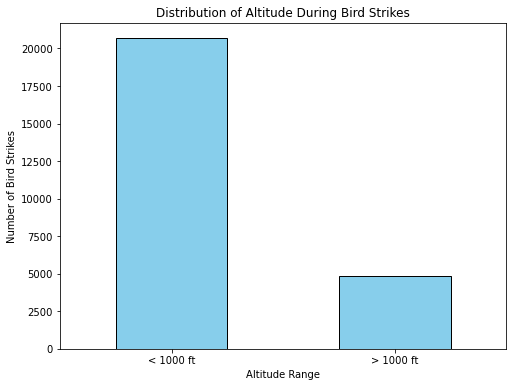

In [51]:
def plot_altitude_distribution(df):
     altitude_counts = df['Altitude bin'].value_counts()
    altitude_counts = altitude_counts.reindex(['< 1000 ft', '> 1000 ft'])

    plt.figure(figsize=(8, 6))
    altitude_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Altitude During Bird Strikes')
    plt.xlabel('Altitude Range')
    plt.ylabel('Number of Bird Strikes')
    plt.xticks(rotation=0)
    plt.show()

# Plot altitude distribution
plot_altitude_distribution(df)

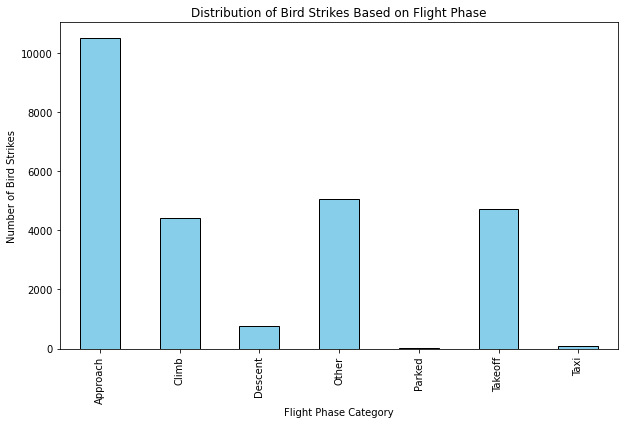

In [53]:
def categorize_bird_strikes(df, phase_column='When: Phase of flight'):
    if phase_column not in df.columns:
        print(f"Column '{phase_column}' not found in the dataset.")
        return

    # Define classification criteria based on provided values
    criteria = {
        'Takeoff': ['Take-off run'],
        'Climb': ['Climb'],
        'Cruise': ['Cruise'],
        'Descent': ['Descent'],
        'Landing': ['Landing', 'Roll'],
        'Taxi': ['Taxi'],
        'Parked': ['Parked'],
        'Approach': ['Approach'],
        'Other': ['Other']
    }

    # Create a new column 'Flight Phase Category' based on classification criteria
    df['Flight Phase Category'] = df[phase_column].apply(classify_flight_phase, criteria=criteria)

    return df

def classify_flight_phase(phase, criteria):
    for category, phases in criteria.items():
        if phase in phases:
            return category
    return 'Other'

def plot_flight_phase_distribution(df):
    plt.figure(figsize=(10, 6))
    df['Flight Phase Category'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Distribution of Bird Strikes Based on Flight Phase')
    plt.xlabel('Flight Phase Category')
    plt.ylabel('Number of Bird Strikes')
    plt.show()

# Example usage:
bird_strike_data = categorize_bird_strikes(df)
plot_flight_phase_distribution(bird_strike_data)

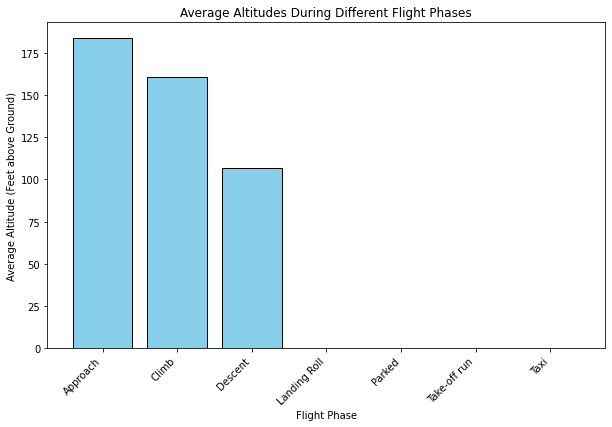

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

def calculate_average_altitudes(df, altitude_column='Feet above ground', phase_column='When: Phase of flight'):
    if altitude_column not in df.columns or phase_column not in df.columns:
        print(f"Columns '{altitude_column}' or '{phase_column}' not found in the dataset.")
        return

    # Group by flight phase and calculate the average altitude
    avg_altitudes = df.groupby(phase_column)[altitude_column].mean().reset_index()

    return avg_altitudes

def visualize_average_altitudes(avg_altitudes):

    plt.figure(figsize=(10, 6))
    plt.bar(avg_altitudes['When: Phase of flight'], avg_altitudes['Feet above ground'], color='skyblue', edgecolor='black')
    plt.title('Average Altitudes During Different Flight Phases')
    plt.xlabel('Flight Phase')
    plt.ylabel('Average Altitude (Feet above Ground)')
    plt.xticks(rotation=45, ha='right')
    plt.show()

average_altitudes = calculate_average_altitudes(df)
visualize_average_altitudes(average_altitudes)

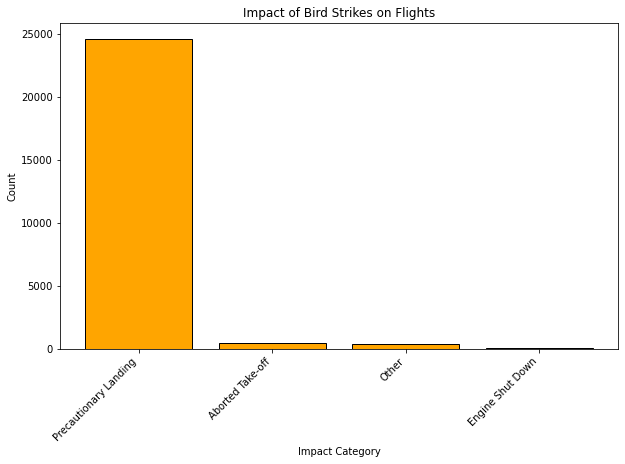

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_bird_strike_impact(df, impact_column='Effect: Impact to flight'):
    if impact_column not in df.columns:
        print(f"Column '{impact_column}' not found in the dataset.")
        return

    # Count the occurrences of each impact category
    impact_counts = df[impact_column].value_counts().reset_index()
    impact_counts.columns = ['Impact Category', 'Count']

    return impact_counts

def visualize_impact_counts(impact_counts):
    plt.figure(figsize=(10, 6))
    plt.bar(impact_counts['Impact Category'], impact_counts['Count'], color='orange', edgecolor='black')
    plt.title('Impact of Bird Strikes on Flights')
    plt.xlabel('Impact Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()

impact_counts = analyze_bird_strike_impact(df)
visualize_impact_counts(impact_counts)

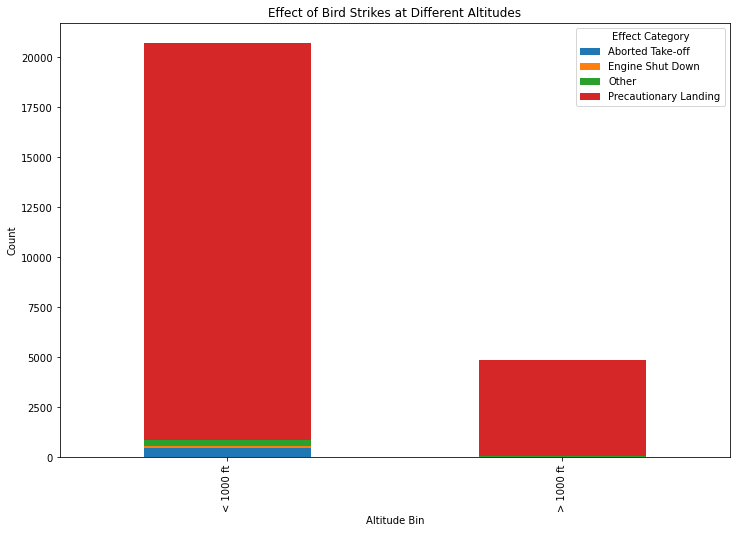

In [60]:
def analyze_altitude_effect(df, altitude_column='Altitude bin', effect_column='Effect: Impact to flight'):
    
    if altitude_column not in df.columns or effect_column not in df.columns:
        print(f"Column '{altitude_column}' or '{effect_column}' not found in the dataset.")
        return

    # Group by altitude and impact, then count occurrences
    altitude_effect_counts = df.groupby([altitude_column, effect_column]).size().unstack(fill_value=0).reset_index()

    return altitude_effect_counts

def visualize_altitude_effect(altitude_effect_counts):
    # Plot a stacked bar chart
    altitude_effect_counts.plot(x='Altitude bin', kind='bar', stacked=True, figsize=(12, 8))
    plt.title('Effect of Bird Strikes at Different Altitudes')
    plt.xlabel('Altitude Bin')
    plt.ylabel('Count')
    plt.legend(title='Effect Category', bbox_to_anchor=(1, 1))
    plt.show()


altitude_effect_counts = analyze_altitude_effect(df)
visualize_altitude_effect(altitude_effect_counts)

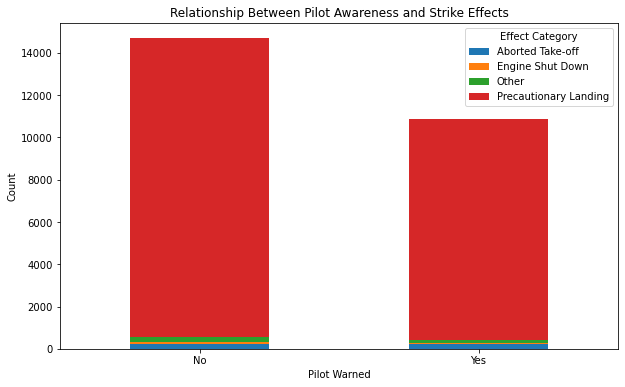

In [62]:
def analyze_pilot_awareness(df, warning_column='Pilot warned of birds or wildlife?', effect_column='Effect: Impact to flight'):
    if warning_column not in df.columns or effect_column not in df.columns:
        print(f"Column '{warning_column}' or '{effect_column}' not found in the dataset.")
        return

    # Group by warning and impact, then count occurrences
    pilot_awareness_counts = df.groupby([warning_column, effect_column]).size().unstack(fill_value=0).reset_index()

    return pilot_awareness_counts

def visualize_pilot_awareness(pilot_awareness_counts):
   # Plot a stacked bar chart
    pilot_awareness_counts.plot(x='Pilot warned of birds or wildlife?', kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Relationship Between Pilot Awareness and Strike Effects')
    plt.xlabel('Pilot Warned')
    plt.ylabel('Count')
    plt.legend(title='Effect Category', bbox_to_anchor=(1, 1))
    plt.xticks(ticks=[0, 1], labels=['No', 'Yes'], rotation=0)
    plt.show()

pilot_awareness_counts = analyze_pilot_awareness(df)
visualize_pilot_awareness(pilot_awareness_counts)
